# Loading Virgo and plotting a DARM TF

First load in the necessary packages, and write a function to produce a DARM TF. There are 2 main options here which we'll try:

1. Use the built-in virgo.py tool `get_DARM()`
2. Write your own function `get_darm()`. This one can be used with ordinary finesse models as well as virgo models, but of course means you have to write it yourself. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import finesse
import finesse.virgo
import finesse.analysis.actions as fac

finesse.configure(plotting=True)

#tester function, nomimally identical to virgo.get_DARM()
def get_darm(model, axis=[.5, 1000, 200]):
    kat = model.deepcopy()
    kat.parse("""
    fsig(1)
    sgen sigQ NE.mech.F_z phase=180
    sgen sigI WE.mech.F_z

    pd2 darm SRAR.p2.o f1=eom56.f phase1=B1p_56.phase f2=fsig.f phase2=none
    """)
    return kat.run(fac.Xaxis(kat.fsig.f, "log", *axis))

## common model included with `finesse-virgo`

Adjusting recycling cavity lengths...
Pretuning...
Optimizing demodulation phases...
Optimizing lock gains...
Running RF locks...
Switching to DARM DC lock...
Done.


array([<Axes: title={'center': 'DARM TF'}, ylabel='Amplitude [$\\sqrt{W}$]'>,
       <Axes: xlabel='f [Hz]', ylabel='Phase [deg]'>], dtype=object)

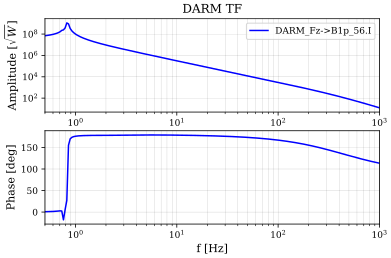

In [2]:
# load in the main virgo model with HOMs up to 4th order
virgo = finesse.virgo.Virgo(maxtem=4)
virgo.make()

virgo.plot_DARM()

## other virgo models

You can also load in your own virgo kat files, either just as a finesse object, or as a virgo oject with `virgo-finesse` functionality

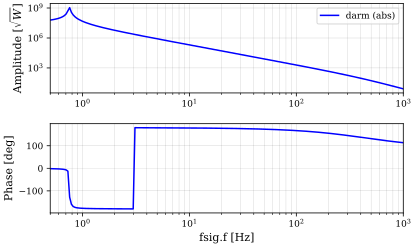

array([<Axes: title={'center': 'DARM TF'}, ylabel='Amplitude [$\\sqrt{W}$]'>,
       <Axes: xlabel='f [Hz]', ylabel='Phase [deg]'>], dtype=object)

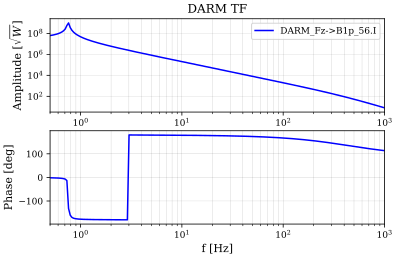

In [3]:
local_file = "virgoKat_tuned.kat" 
# NB this file has already been tuned to an operating point (equivalent to steps in virgo.make())
# so behaves similarly when passed as an ordinary finesse object or virgo object.
# more generally, one should follow the guide in custom_katscript. 

#loading as an ordinary kat script 
model = finesse.Model()
model.parse_file(local_file)
#cannot use .make() as this is a finesse-virgo function
get_darm(model).plot(['darm'],log=True) #cannot use .plot_DARM() tool as this is a finesse-virgo function

#loading as a finesse-virgo object. 
#NB this example file was prepared using the default of zero_k00=True in finesse3
#so we need to override the virgo default (zero_k00=False) here
localvirgo = finesse.virgo.Virgo(files_to_parse=local_file, add_locks=False, zero_k00=True)
localvirgo.model.parse("dof DARM_Fz NE.dofs.F_z -1 WE.dofs.F_z +1")
localvirgo.plot_DARM()